<a href="https://colab.research.google.com/github/miller00315/ia_studies/blob/main/time_series_forecasting_with_tensor_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Forecast](https://otexts.com/fpp3/)

[Nbeats](https://arxiv.org/abs/1905.10437)

[coinDesk](https://coindesk.com/price/bitcoin)

# Time series forecasting funcamentals with TensorFlow + ilestone Project 3: Bit Predict 💰 📈

Let's write some TensorFlow code to predict the price of Bitcoin based on the historical price of bitcoin.

📛 **Note:** This is not financial advice.


## Get the data

We're going to be using the historical price data of Bitcoin to try and predict the future price of Bitcoin.

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-06-21 15:27:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2024-06-21 15:27:34 (4.95 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Import time series with pandas

In [ ]:
# Import with pandas
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
# How many samples do we have?
len(df)

2787

We've collected the historical price of Bitcoin for the past ~8 yers but there's 2787 samples.

Typically deep learning model usually like lots and lots of samples (where lots and lots can thousands to ten of thousand of millions).

A smaller number of samples is something you'll often run into with time series data problems.

> 🔑 **Note:** the **seasonality** of a time series dataset is referred as teh number of samples per year. So for our Bitcoin, it has a seasonality of daily or value of 365 beause wwe collect one sample per day meaning we'll get 365 samples per year.

In [ ]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


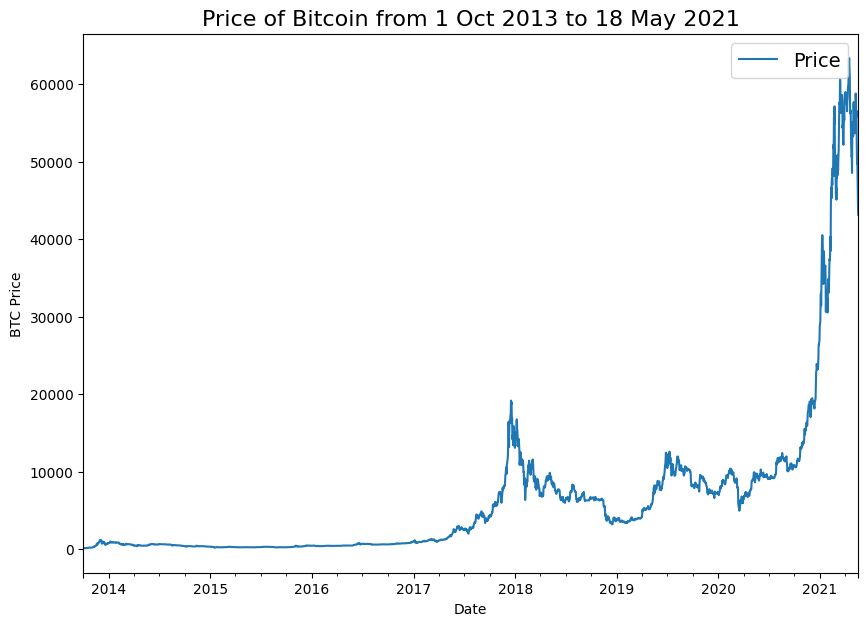

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [ ]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

## Import time series dta with Python's CSV module

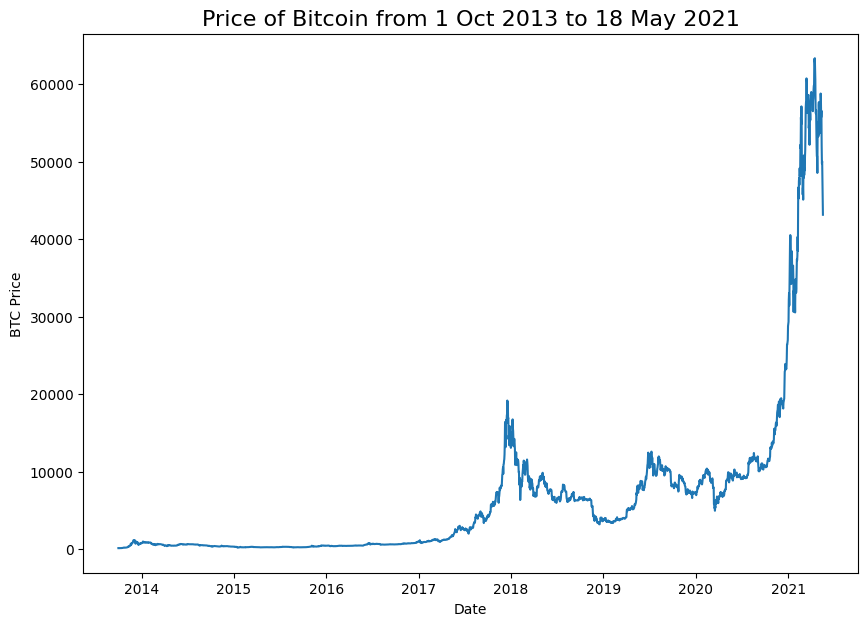

In [ ]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

In [ ]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

## Format data part 1: Create train and test sets of our time series data

### Creating train and test sets with time series (the wrong way)

In [ ]:
# Wrong way to make train/test sets for time series
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

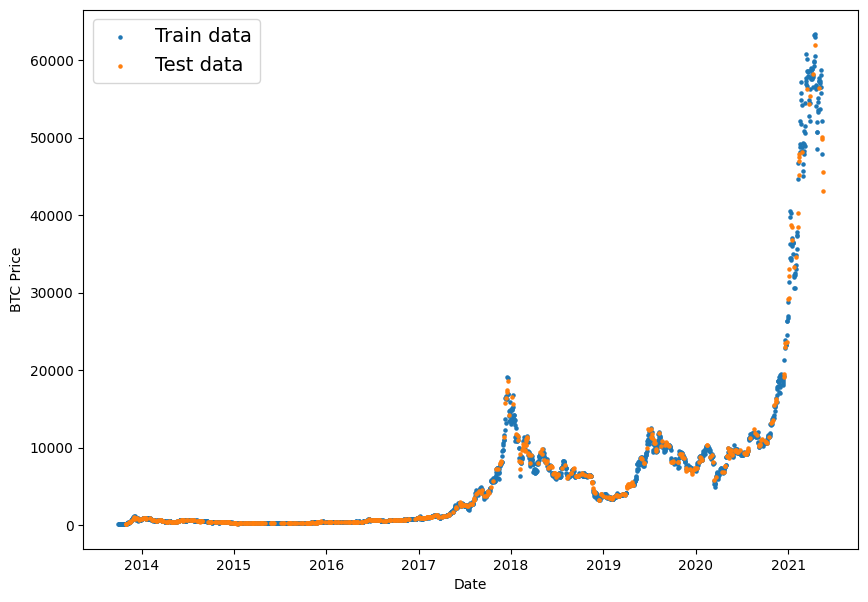

In [ ]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();


### Create train and test sets right way

In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

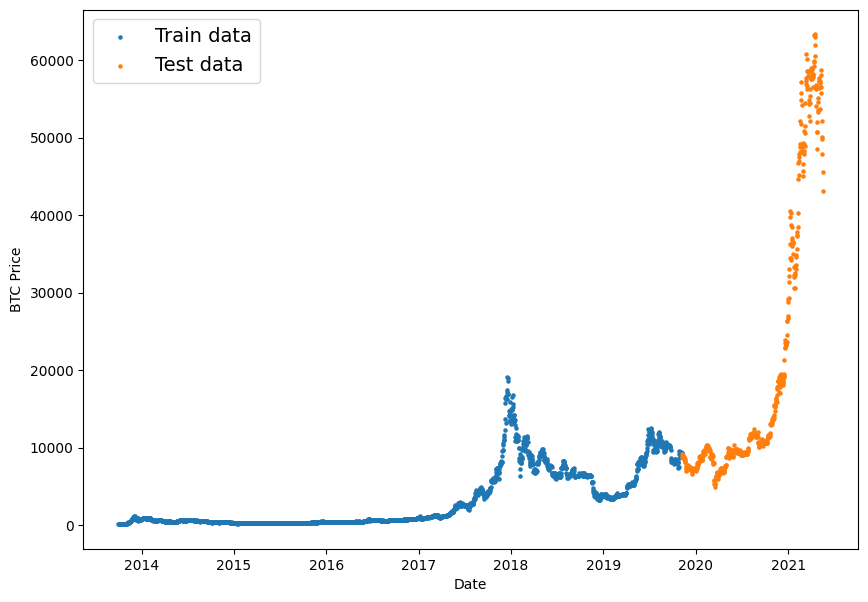

In [ ]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();


### Creating a ploting fnction

Typing ploting code is tedious, let's functionize it

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

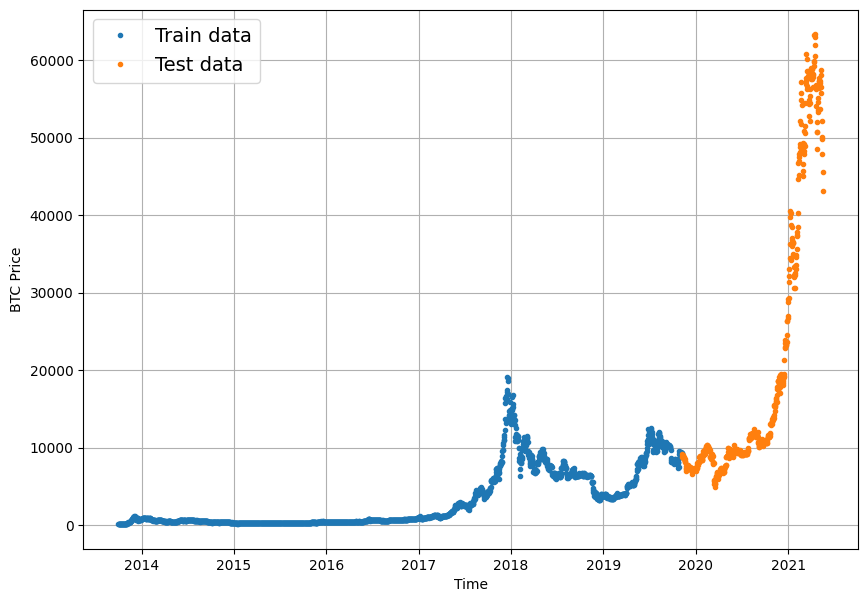

In [ ]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling experiments

We've got som Bitcoin histrical data, let's run a series of mdoelling experiments and see which model performs best.

Terms to be familiar with:

* **Horizon** = number of timesteps into the future we're going to predict
* **Window size** = number of timestps we're going ot us to predict **horizon**

Modelling experiments we're running:

* 0	Naïve model (baseline)
* 1	Dense model, horizon = 1, window = 7
* 2	Same as 1, horizon = 1, window = 30
* 3	Same as 1, horizon = 7, window = 30
* 4	Conv1D
* 5	LSTM
* 6	Same as 1 (but with multivariate data)
* 7	N-BEATs Algorithm
* 8	Ensemble (multiple models optimized on different loss functions)
* 9	Future prediction model (model to predict future values)
* 10	Same as 1 (but with turkey 🦃 data introduced)


## Model 0: Naive forecast (baseline)

The formula look like this:

$$\hat{y}/_{t}=y_{t-1}$$

In English:

> The prediciton at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for horizon of 1.

In [ ]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [ ]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

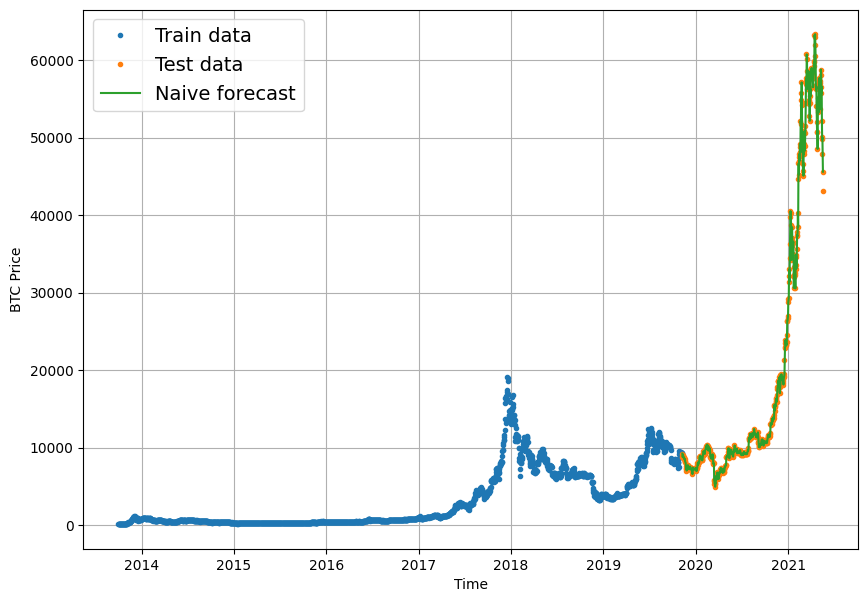

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

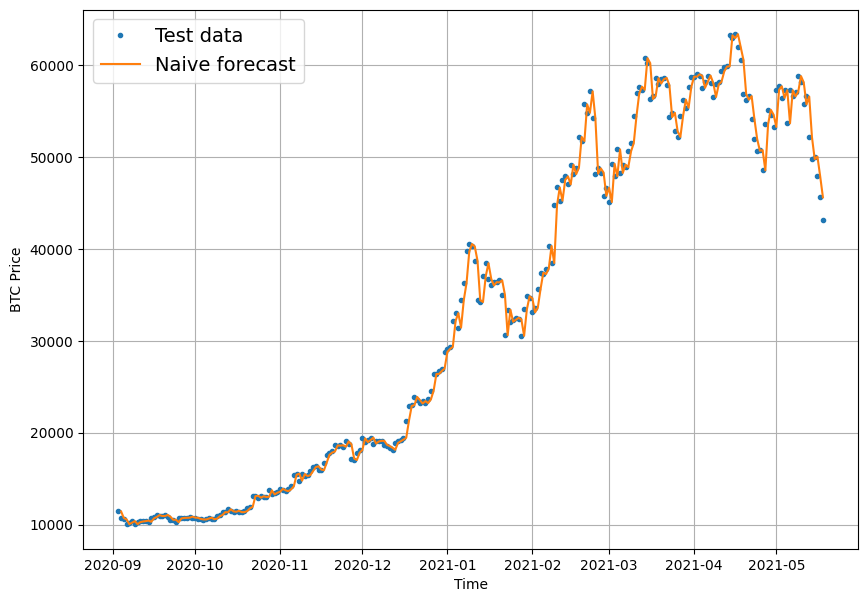

In [ ]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

## Evaluating a time series model

Let's look into some evaluatyion metrics for time series oforecasting.

What are we doing?

We're predictiing a number , so that mean we have a form of regresion problem.

Because we're working on a regression problem, we'll need some regresion like metrics.

A few common regresion metrics (which can also be used for time serties forecasting):

* MAE - mean absolute error - on average, how wrong is each of my models prediction
* MSE - mean squared error - on average, how wrong is each of my models prediction
* RMSE - root mean squared error - on average, how wrong is each of my models prediction
* MAPE - mean absolute percentage error - on average, how wrong is each of my models prediction
* MASE - mean absolute scaled error - on average, how much worse is each of my models prediction

For all of the above metrics, **lowe is better**, for example, a MAE of 0 that is better than a MAE of 100.

The main thing we're evaluating here is: how do our model's forecasts (y_pred) compare against the actual values (y_true our ground true values)?

In [ ]:
import tensorflow as tf

In [ ]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [ ]:

def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
tf.squeeze(y_test[1:])

<tf.Tensor: shape=(557,), dtype=float64, numpy=
array([ 8794.35864452,  8798.04205463,  9081.18687849,  8711.53433917,
        8760.89271814,  8749.52059102,  8656.97092235,  8500.64355816,
        8469.2608989 ,  8537.33965197,  8205.80636599,  8118.4885358 ,
        8074.84317361,  7612.7405735 ,  7262.11053495,  7303.40575852,
        7041.73293642,  7211.86180875,  7141.06944869,  7523.4806726 ,
        7390.20746923,  7729.26593894,  7542.23560864,  7381.96300782,
        7333.43293049,  7315.36776456,  7213.73376172,  7398.78704961,
        7511.88058312,  7532.12351309,  7550.23919987,  7333.09604316,
        7239.76257544,  7198.06667705,  7190.27236926,  7238.87432299,
        7087.02498535,  7112.73147612,  6883.49639377,  6584.02884335,
        7424.01540023,  7147.56832379,  7139.93337053,  7286.33508116,
        7236.98620461,  7166.17237853,  7235.6266505 ,  7212.80939522,
        7183.70653603,  7227.29371168,  7311.56064392,  7385.46484791,
        7251.27679432,  7179.

In [ ]:

naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [ ]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

20056.632963737226

In [ ]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

## Formating dta part 2: Windows our dataset

Why do we window?


We window our time series dataset to turn our data into a supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [ ]:
# What we wnat to do with our Bitcoin data

print(f"We want to use {btc_price[:7]} to predict {btc_price[7]}")

We want to use [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict 123.033


In [ ]:
# Let's setup global variables for window and horizon size

HORIZON = 1 # predict next one day
WINDOW_SIZE = 7 # use the past week of bitcoin data to make prediction

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """

  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8) + 1, axis=0))

print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


We've got a way to label our windowed data.

However, this only works on a small scalle.

We need a way to do the above across our entire time series.

We could do this with Python for lops, however, for large time series, thst'd be quite sllow.

To speed things up, we'll leverage NumPy's array indexing - https://numpy.org/doc/stable/reference/arrays.indexing.html

Our function will:

1. Create a window step of specific window size (e.g. [0, 1,2,3,4,5,6])

2. Use Numpy indexing to create a 2D array of multiple window steps, for example:

```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
```

3. uses the 2D array of multiple windows stpes (from 2.) to index on a target series (e.g. the historical price of bitcoin)

4. Uses our `get_labelled_windows` function we created above to turn the window steps into windows with a specified horizon.

> 📖 **Resource:** The function we're about to create has been adapted from the following article:

https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [ ]:
# Create fnuction to view Numpy arrays as windows
import numpy as np

def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window size (add the horizon on the end forlabelling later)
  window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# View the first 3 windows / labels

for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


🔑 **Note:** There's a function which does similar to the above tf.keras.preprocessing, an extension could be try and replicate what we've done using the premade function:

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/timeseries_dataset_from_array

## Turning winodws into training and test sets



In [ ]:
# Make the train/test splits

def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  # Make the splits
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [ ]:
# Create train and test windows

train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [ ]:
train_labels[:5].shape

(5, 1)

### Make a modelling checkpoint

Because our model's perfomance will fluctuate from experiment to experiment, we're going to write a model chckpoint so we compare apples to apples.

Moe specifically, we want compare each of our model's best performances against the other model's best performances.

For examples if our model performs teh best on epoch 55 (but we're trainig for 100 epochs), we want to load and evaluate tehe model saved on epoch 55.

We can create a modelling checkpoint callback using the following:

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create file
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

## Model 1: Dense Model (window = 7, horizon = 1)

Our first model is going to be a simple dense model:

* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimization and MAE loss function
* Batch size of 128 (prevously we've used 32)
* 100 epochs

Why these values?

I picked them out of experimaentation.


* *Hyperparameters* = values a machine learning practioner (you!) can adjust themelves

* **Parameters** = values a model learns on its own

In [ ]:
train_windows

array([[ 123.65499   ,  125.455     ,  108.58483   , ...,  121.33866   ,
         120.65533   ,  121.795     ],
       [ 125.455     ,  108.58483   ,  118.67466   , ...,  120.65533   ,
         121.795     ,  123.033     ],
       [ 108.58483   ,  118.67466   ,  121.33866   , ...,  121.795     ,
         123.033     ,  124.049     ],
       ...,
       [9225.99547934, 9131.41063031, 9197.63234462, ..., 9202.41545055,
        9369.62808116, 9326.59962378],
       [9131.41063031, 9197.63234462, 9290.89660239, ..., 9369.62808116,
        9326.59962378, 9335.75240233],
       [9197.63234462, 9290.89660239, 9202.41545055, ..., 9326.59962378,
        9335.75240233, 9226.48582088]])

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for a reproductable results as possible

tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # name our model so we can save it

# 2. Compile the model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_1_history = model_1.fit(x=train_windows,
                              y=train_labels,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 1s 39ms/step - loss: 1168.6215 - mae: 1168.6215 - mse: 5117465.5000 - val_loss: 2928.9666 - val_mae: 2928.9666 - val_mse: 17965872.0000
Epoch 2/100
18/18 [==============================] - 0s 24ms/step - loss: 266.0720 - mae: 266.0720 - mse: 301032.4375 - val_loss: 853.9667 - val_mae: 853.9667 - val_mse: 2448134.0000
Epoch 3/100
18/18 [==============================] - 0s 23ms/step - loss: 154.9624 - mae: 154.9624 - mse: 122295.7812 - val_loss: 796.7062 - val_mae: 796.7062 - val_mse: 2160295.2500
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 145.1728 - mae: 145.1728 - mse: 116339.1875 - val_loss: 797.1371 - val_mae: 797.1371 - val_mse: 2045147.8750
Epoch 5/100
18/18 [==============================] - 0s 23ms/step - loss: 139.5911 - mae: 139.5911 - mse: 110696.8672 - val_loss: 760.7470 - val_mae: 760.7470 - val_mse: 1927674.8750
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 137.801

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Evaluate on tes data

model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 633.6752 - mae: 633.6752 - mse: 1291129.3750


[633.6752319335938, 633.6752319335938, 1291129.375]

In [ ]:
# Load in saved best performin model_1 and evaluate it on test data

model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.5037 - mae: 568.5037 - mse: 1167107.7500


[568.5037231445312, 568.5037231445312, 1167107.75]

## Making forecast with a model (on the test dataset)

To make "forecasts" on the test dataset (note: these won't be acyual for forecast, tehy're only pseudo forcats because actual forecast are into future), jet's write a fuction to:

1. Take in a train model_experiments
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the inpt data to teh model's `predict` method
4. Returns the predictions




In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
# Make predctions using model_1 on the test dataset

model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 1ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8842.887 , 8751.224 , 9020.306 , 8793.696 , 8714.86  , 8728.897 ,
        8664.642 , 8510.589 , 8442.5205, 8510.861 ], dtype=float32)>)

In [ ]:
test_labels[:10]

array([[8798.04205463],
       [9081.18687849],
       [8711.53433917],
       [8760.89271814],
       [8749.52059102],
       [8656.97092235],
       [8500.64355816],
       [8469.2608989 ],
       [8537.33965197],
       [8205.80636599]])

In [ ]:
# Evaluate preds

model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 568.5037,
 'mse': 1167107.9,
 'rmse': 1080.3276,
 'mape': 2.5398915,
 'mase': 0.9987036}

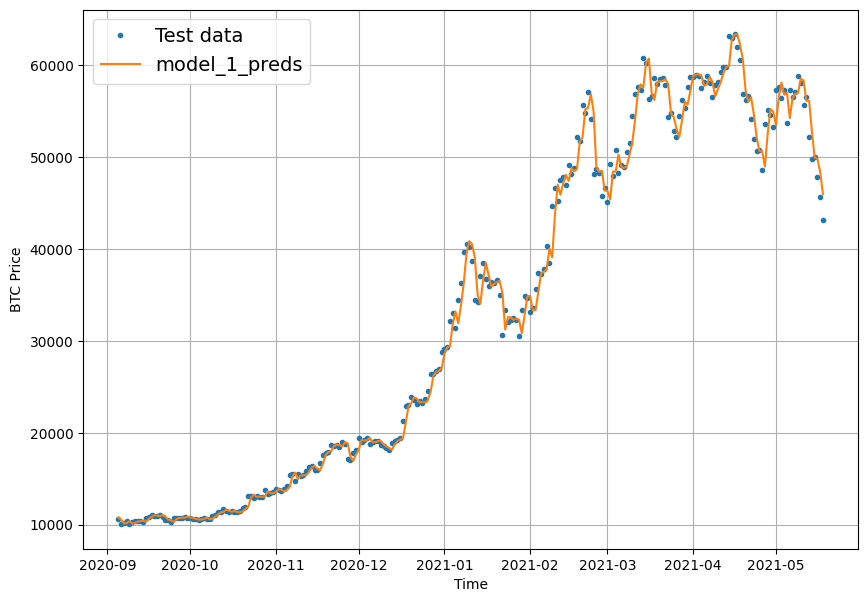

In [ ]:
# Let's plt our mdoe 1 predictions

offset = 300
plt.figure(figsize=(10, 7))

# Account for the test_window offset and index into test_labels to ensure correct plotting

plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")


## Model 2: Dense (window = 30, horizon = 1)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 30 # using 300 time steps in past

In [ ]:

# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:

# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:

tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])


In [ ]:
model_2.summary()

Model: "model_2_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               3968      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 625.5488


625.5487670898438

In [ ]:
loaded_model_2 = tf.keras.models.load_model("model_experiments/model_2_dense")
loaded_model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 606.6322


606.6322021484375

In [ ]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=make_preds(loaded_model_2, test_windows))
model_2_results

18/18 [==============================] - 0s 1ms/step


{'mae': 606.63214,
 'mse': 1277131.1,
 'rmse': 1130.1023,
 'mape': 2.7299578,
 'mase': 1.0603988}

In [ ]:
model_2_preds = make_preds(loaded_model_2, test_windows)
model_2_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8789.533 , 8759.682 , 8726.516 , 8591.107 , 8550.383 , 8430.12  ,
       8264.522 , 8176.157 , 8085.2153, 7790.3022], dtype=float32)>

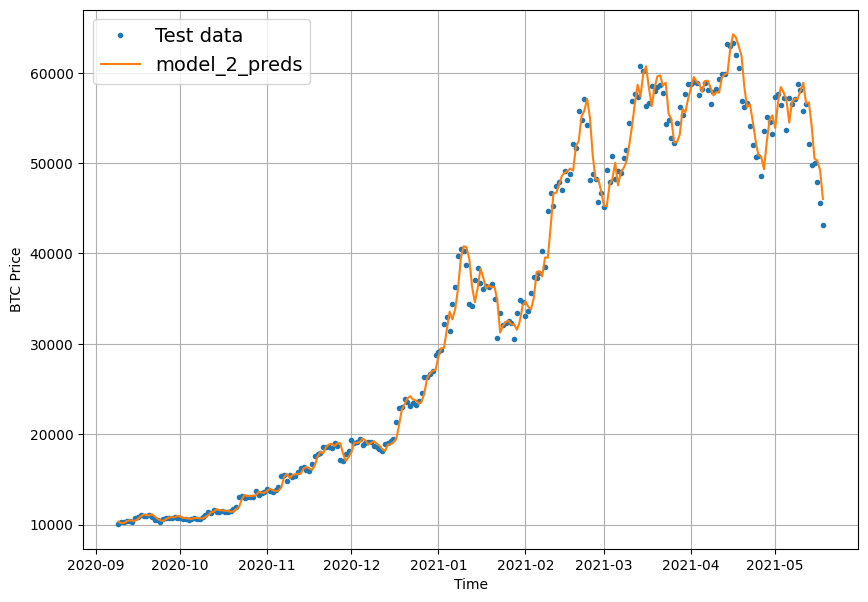

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## Model 3: Dense (window = 30, horizon = 7)

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 1354.0531


1354.0531005859375

In [ ]:
mdoel_3_loaded = tf.keras.models.load_model("model_experiments/model_3_dense")
mdoel_3_loaded.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 1238.7380


1238.738037109375

In [ ]:
model_3_preds = make_preds(mdoel_3_loaded, test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9386.117, 9451.15 , 9320.862, 9576.593, 9514.528, 9444.868,
        9497.066],
       [9101.196, 9081.153, 8933.33 , 9228.868, 9155.88 , 9294.625,
        9212.71 ],
       [8872.719, 9025.23 , 8806.239, 8979.413, 8868.136, 9129.097,
        9121.018],
       [8942.194, 9242.397, 9095.682, 9069.086, 8951.77 , 9200.43 ,
        9169.805],
       [8805.576, 9055.98 , 9123.752, 9019.31 , 8960.416, 9129.132,
        9183.659]], dtype=float32)>

## Make our evaluation function work for larger horizons

In [ ]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1238.738,
 'mse': 5384239.0,
 'rmse': 1425.7638,
 'mape': 5.614182,
 'mase': 2.2042649}

We've made and ecaluated predicitons with `model_3`, let's
visualize, visualize, visualize!

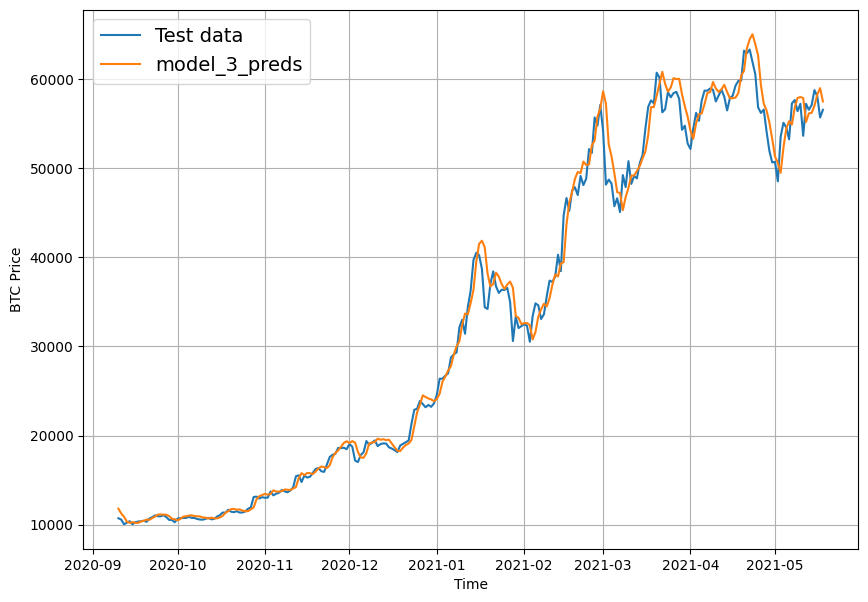

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format='-', label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), format='-', start=offset, label="model_3_preds")

# Which of our models is performing the best so far

So we've trained few models, now let's compare them and see how they've gone..

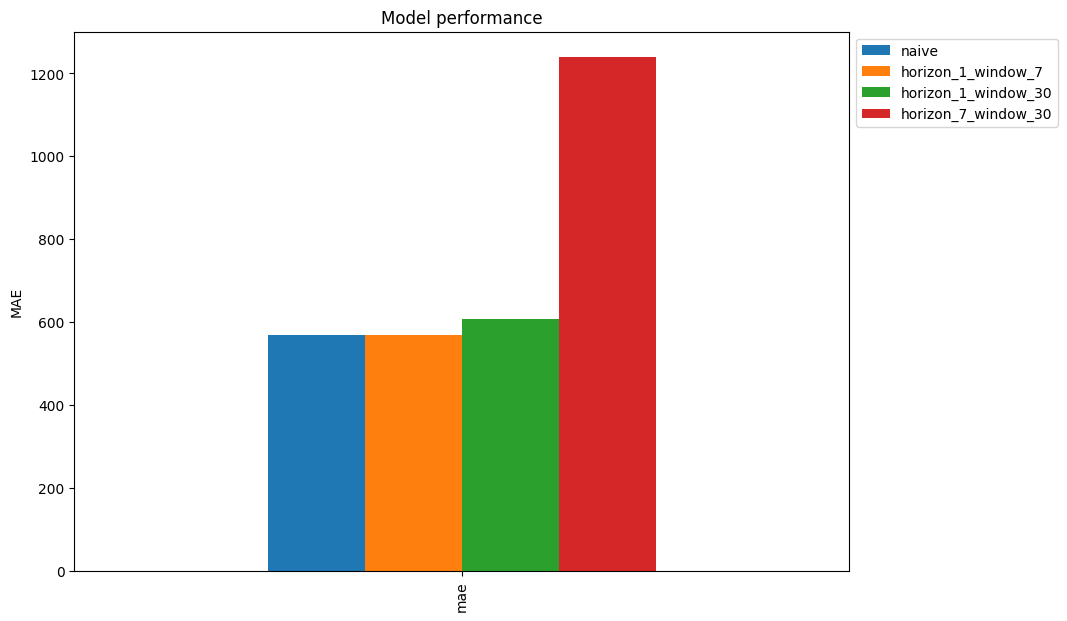

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(kind="bar", figsize=(10, 7))
plt.title("Model performance")
plt.ylabel("MAE")
plt.legend(bbox_to_anchor=(1.0, 1.0));

https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfails-19f9d7adf424

### Model 4: Conv 1D



In [ ]:
HORIZON = 1 # Predict next day bitocin price
WINDOW_SIZE = 7 # use precious 7 week worth dtat

In [ ]:
# Create widowed data

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

To use the Conv1D layer, we need an input shape of: `(batch_size, timesteps, input_dim)`...

However our dta isn't in that shape yet...

In [ ]:
train_windows[0].shape

(7,)

In [ ]:
# Before we pass our dat to the Conv1d layer , we have to reshape it in order to make sure it works

x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add a extra dimension for `input_dim`

In [ ]:
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")

Original shape: (7,)
Expanded shape: (7, 1)


In [ ]:
tf.random.set_seed(42)

# Create Conv1D model

model_4 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # reshape
  layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1d")

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_4.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [ ]:
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 583.6872 - mae: 583.6872


[583.6871948242188, 583.6871948242188]

In [ ]:
model_4_loaded = tf.keras.models.load_model("model_experiments/model_4_conv1d")
model_4_loaded.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 574.5053 - mae: 574.5053


[574.5053100585938, 574.5053100585938]

In [ ]:
model_4_preds = make_preds(model_4_loaded, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8908.651, 8799.026, 8992.781, 8797.083, 8738.957, 8732.192,
       8687.208, 8549.709, 8457.554, 8519.82 ], dtype=float32)>

In [ ]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 574.5054,
 'mse': 1199907.8,
 'rmse': 1095.403,
 'mape': 2.5880003,
 'mase': 1.0092468}

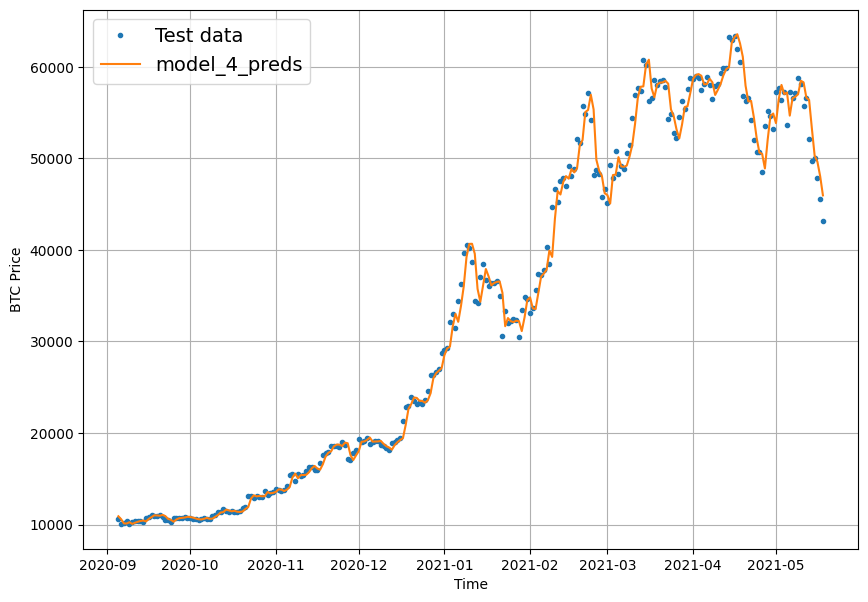

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_4_preds, start=offset, format="-", label="model_4_preds")

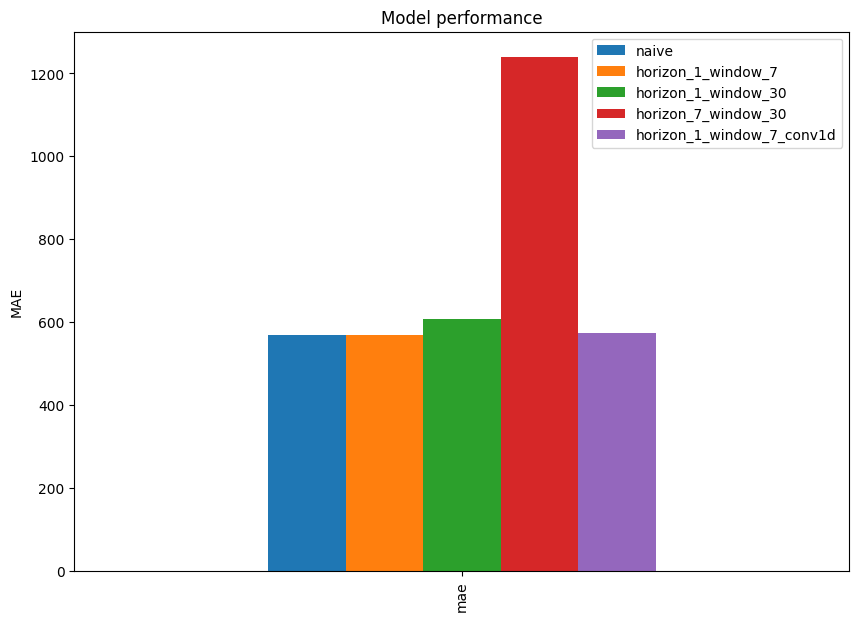

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"],
              "horizon_1_window_7_conv1d": model_4_results["mae"]
              }, index=["mae"]).plot(kind="bar", figsize=(10, 7))
plt.title("Model performance")
plt.ylabel("MAE")
plt.legend(bbox_to_anchor=(1.0, 1.0));

## Model 5: RNN LSTM

Let's build an RNN model for our time series data.

We will use the same data that we creted previouslt

In [ ]:
from tensorflow.keras import layers

tf.random.set_seed(42)

#Lets build a LSTM model with the Functional API


inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
#x = layers.Dense(32, activation="relu")(x)

outputs = layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs=inputs, outputs=outputs, name="model_5_lstm")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 3s 99ms/step - loss: 2666.3743 - mae: 2666.3743 - val_loss: 13180.5674 - val_mae: 13180.5674
Epoch 2/100
18/18 [==============================] - 2s 108ms/step - loss: 1318.2955 - mae: 1318.2955 - val_loss: 2191.5757 - val_mae: 2191.5757
Epoch 3/100
18/18 [==============================] - 1s 86ms/step - loss: 271.8759 - mae: 271.8759 - val_loss: 991.9020 - val_mae: 991.9020
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 188.6851 - mae: 188.6851 - val_loss: 995.1176 - val_mae: 995.1176
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 181.0682 - mae: 181.0682 - val_loss: 1019.6294 - val_mae: 1019.6294
Epoch 6/100
18/18 [==============================] - 1s 88ms/step - loss: 179.1732 - mae: 179.1732 - val_loss: 986.0312 - val_mae: 986.0311
Epoch 7/100
18/18 [==============================] - 1s 87ms/step - loss: 174.2789 - mae: 174.2789 - val_loss: 984.2624 - val_mae: 984.2624
Epoch 8/1

In [ ]:
model_5.summary()

Model: "model_5_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 lambda_2 (Lambda)           (None, 1, 7)              0         
                                                                 
 lstm (LSTM)                 (None, 128)               69632     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 69761 (272.50 KB)
Trainable params: 69761 (272.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 595.7227 - mae: 595.7227


[595.72265625, 595.72265625]

In [ ]:
model_5_loaded = tf.keras.models.load_model("model_experiments/model_5_lstm")
model_5_loaded.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 580.5801 - mae: 580.5801


[580.580078125, 580.580078125]

In [ ]:
model_5_preds = make_preds(model_5_loaded, test_windows)
model_5_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8913.401, 8792.027, 8959.903, 8765.57 , 8744.446, 8731.667,
       8674.687, 8538.848, 8456.364, 8503.365], dtype=float32)>

In [ ]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 580.5801,
 'mse': 1215069.2,
 'rmse': 1102.3018,
 'mape': 2.6186543,
 'mase': 1.0199184}

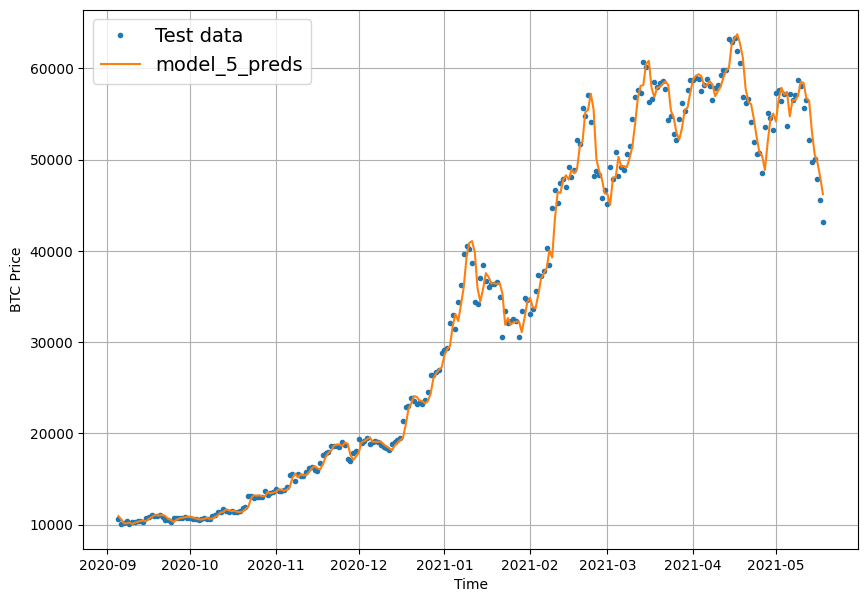

In [ ]:
plt.figure(figsize=(10, 7))

offset = 300

plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_5_preds, start=offset, format="-", label="model_5_preds")

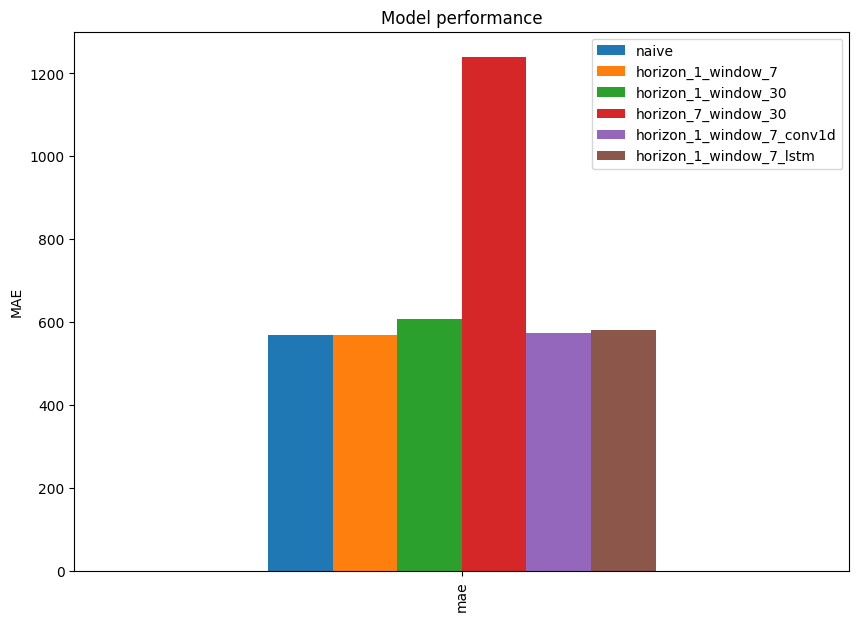

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"],
              "horizon_1_window_7_conv1d": model_4_results["mae"],
              "horizon_1_window_7_lstm": model_5_results["mae"]
              }, index=["mae"]).plot(kind="bar", figsize=(10, 7))
plt.title("Model performance")
plt.ylabel("MAE")
plt.legend(bbox_to_anchor=(1.0, 1.0));

## Make a multivariate time series dataset

before we add a feature to our time series, what is a feature we can use?

One feature we could add is whether or not Daniel Bourke tweeted that day...

* day 1 - 0
* day 2 - 1
* day 3 - 0

What's a better feature to use?

https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

In [ ]:
# Let's add the bitcoin having event to our dataset

block_reward_1 = 50 # 3 january 2009 - this block isn't in our datset
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 july 2016
block_reward_4 = 6.25 # 18 May 2020

block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime =np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [ ]:
block_reward_days = [block_reward_1, block_reward_2, block_reward_3, block_reward_4]
block_reward_days

[50, 25, 12.5, 6.25]

In [ ]:
# Create date ranges of where specific block_reward values sho
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

block_reward_2_days, block_reward_3_days

(1012, 2421)

In [ ]:
# Add in a block_reward column

bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None


In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [ ]:
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [ ]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<Axes: xlabel='Date'>

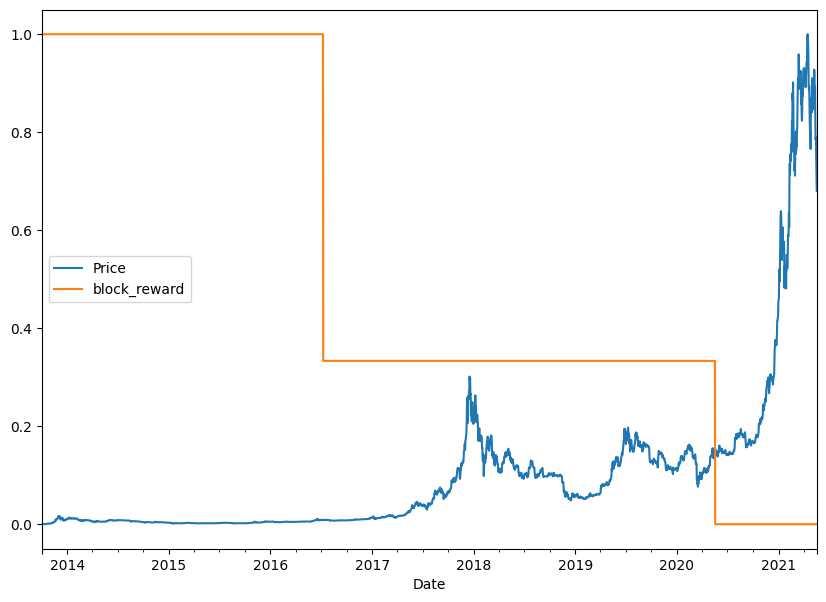

In [ ]:
from sklearn.preprocessing import minmax_scale

scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)


scaled_price_block_df.plot(figsize=(10, 7))

## Making a windowed dataset with

Previously, we've turned our univariate time series into windowed datset using helper functions above.

However, since we've got multivariate adat, the fucntions won't work.

Not to worry, we can use the pandas.DataFrame.shift() method to window our multivariate data.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

In [ ]:
# Setup dataset hyperparameters

HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make copy of the Bitcoin historical dat with block reward feature

bitcoin_prices_windowed = bitcoin_prices_block.copy()

In [ ]:
# Add windowed columns

for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)

What we've donw is created a way to window our dataset directly from a pandas dataframe.

```
[0,1,2,3,4,5,6, block_reward] -> [7]
[1,2,3,4,5,6,7, block_reward] -> [7]
[2,3,4,5,6,7,8, block_reward] -> [7]
```

In [ ]:
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
# Create X (windows) and y (horizons) features

X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

In [ ]:
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [ ]:
# Make train and test sets using indexing

split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]

X_test, y_test = X[split_size:], y[split_size:]

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

## Model 6: Dense (multivariate time series)

In [ ]:
tf.random.set_seed(42)

# Make multi vatiate timeseries model

model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_6_dense")

# Compile model
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit model
model_6.fit(X_train,
            y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - 1s 31ms/step - loss: 2697.3660 - mae: 2697.3660 - val_loss: 5901.2168 - val_mae: 5901.2168
Epoch 2/100
18/18 [==============================] - 0s 23ms/step - loss: 399.7474 - mae: 399.7474 - val_loss: 1063.9180 - val_mae: 1063.9180
Epoch 3/100
18/18 [==============================] - 0s 22ms/step - loss: 214.4702 - mae: 214.4702 - val_loss: 1040.8649 - val_mae: 1040.8649
Epoch 4/100
18/18 [==============================] - 0s 23ms/step - loss: 186.5779 - mae: 186.5779 - val_loss: 1002.2121 - val_mae: 1002.2121
Epoch 5/100
18/18 [==============================] - 0s 23ms/step - loss: 174.9736 - mae: 174.9736 - val_loss: 929.1768 - val_mae: 929.1768
Epoch 6/100
18/18 [==============================] - 0s 22ms/step - loss: 168.9867 - mae: 168.9867 - val_loss: 924.4087 - val_mae: 924.4087
Epoch 7/100
18/18 [==============================] - 0s 22ms/step - loss: 163.0861 - mae: 163.0861 - val_loss: 919.5734 - val_mae: 919.5734
Epoch 8/10

In [ ]:
model_6.summary()

Model: "model_6_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1152      
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1281 (5.00 KB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 1ms/step - loss: 585.5674 - mae: 585.5674


[585.5674438476562, 585.5674438476562]

In [ ]:
model_6_loaded = tf.keras.models.load_model("model_experiments/model_6_dense")
model_6_loaded.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 571.7947 - mae: 571.7947


[571.794677734375, 571.794677734375]

In [ ]:
model_6_preds = make_preds(model_6_loaded, X_test)
model_6_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8864.482, 8753.385, 9023.087, 8788.641, 8704.15 , 8746.41 ,
       8687.531, 8494.393, 8462.115, 8517.324], dtype=float32)>

In [ ]:
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 571.79456,
 'mse': 1177586.4,
 'rmse': 1085.1665,
 'mape': 2.5413113,
 'mase': 1.0044847}

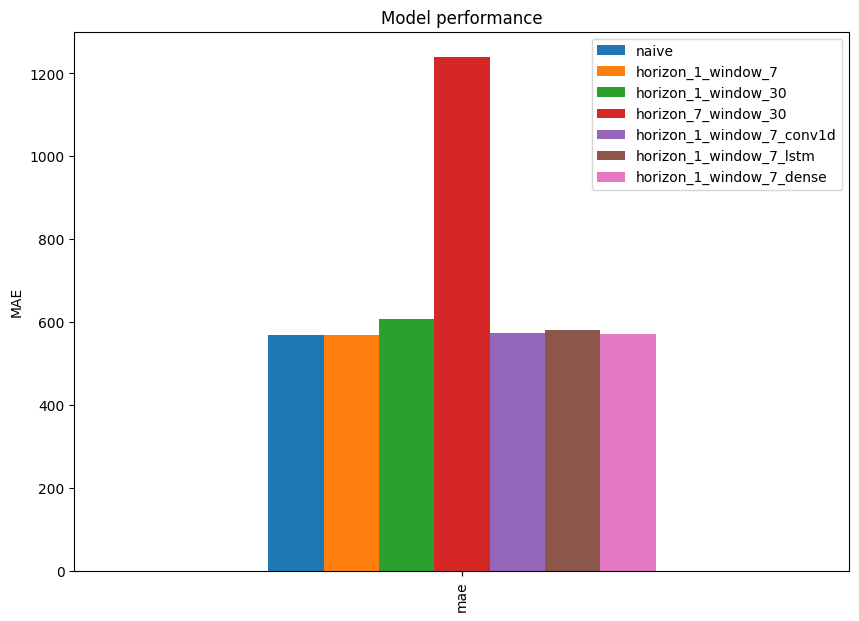

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"],
              "horizon_1_window_7_conv1d": model_4_results["mae"],
              "horizon_1_window_7_lstm": model_5_results["mae"],
              "horizon_1_window_7_dense": model_6_results["mae"]
              }, index=["mae"]).plot(kind="bar", figsize=(10, 7))
plt.title("Model performance")
plt.ylabel("MAE")
plt.legend(bbox_to_anchor=(1.0, 1.0));

## Model 7: N-BEATS algorithm

Lt's now try build the biggest baddest (though maybe not the baddest, as in, it perfofm really well...) time series forecasting model we've built so far.

More specifically, we're ging to be rplicating the algorithm in the floowing papper https://arxiv.org/pdf/1905.10437.pdf


Why?

* this will allow us to practice replicating a paper with Tensorflow code
* We will see how to use Tensor Flow layer subclassing (to make our own custom layers)
* Get expirience using the Functional API to create a custom archtecture
* Potentially get the art results on our problem

### Build and testing N-BEATS bloc layer

Because the N-BEATS bloc layer doesn't exist in TensorFlow, we've got to create it.

To cerate custom layers and models in TensroFlow we can use subclassing:

https://www.tensorflow.org/guide/keras/custom_layers_and_models

In [ ]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

Let's our NBeatsBlock class

To do we'll make some dummy inputs and outputs

In [ ]:
# Set up dummy NBeats Block layer to represent inputs and outputs

dummy_nbeats_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                 theta_size=WINDOW_SIZE + HORIZON, # backcast + forecast
                                 horizon=HORIZON,
                                 n_neurons=128,
                                 n_layers=4)

In [ ]:
# create dummy inputs (have to be same size as input size)

dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # inputs shape to the model has to reflect dense layer input requirement (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inpus to summy NBetas block layer

backcast, forecast = dummy_nbeats_layer(dummy_inputs)

# These are teh activation outpusts of teh theta layer (tehy'll be random to no training of the model)

print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.442312    0.04470113  0.3978073  -0.28905365  0.53819144 -0.56831646
  0.08742763]
Forecast: -0.5348478555679321


### Preparing data for teh N-Beats algorithm using `tf.data`

To make our input data load as fast as possible we're going to be adhering the the performant data pipeline steps in the tf.data guide: https://wwww.tensorflow.org/guide/data_performance

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create N-Beats data inputs (N-BEATS works with univariate time series)

bitcoin_prices_nbeats = bitcoin_prices.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)

In [ ]:
bitcoin_prices_nbeats.head(10)

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_nbeats.dropna()["Price"].astype(np.float32)

In [ ]:
X.head()

,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,
2013-10-08,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [ ]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [ ]:
# Time to make our dataset performant usin tf.data API

train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

In [ ]:
len(train_features_dataset), len(train_labels_dataset), len(test_features_dataset), len(test_labels_dataset)

(2224, 2224, 556, 556)

In [ ]:
# combine Llayer and features by zipping together -> (features, labels)

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

In [ ]:
# Batch and prefetch

BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

The N-BEATS algorithm has a fair few number of parameters, many of them can be found in Table 18: https://arxiv.org/pdf/1905.10437.pdf

In [ ]:
# Values from N-BEATS paper

N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30


INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

## Getting ready for residual connections

before we can craft our N-BEATS model, we need two layers for teh residual connections (subtract and add).

The N-Beats algorithm uses double residual stacking to help train its deeper architcture (section 3.2 of N-Beats paper).

For more on residual connection see: https://en.wikipedia.org/wiki/Residual_neural_network

And here: https://paperswithcode.com/method/resnet

In [ ]:
# Make tensors

tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

In [ ]:
tensor_1, tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

In [ ]:
# Subtract

subtracted = layers.subtract([tensor_1, tensor_2])

# add

added = layers.add([tensor_1, tensor_2])

# get outputs

print(f"Input tensors: {tensor_1.numpy()} and {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] and [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, compiling and fitting N-BEATS algorithm


1. Setup an instance of teh N-BEATS block layer using `NBeatsBlock` (this'll be the initial block used for the network, the rest will be cerated as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using teh Keras Functional API)
3. Make the initial backcast and forecasts for the model with the layer created in (1)
4. Use for loop to cerate stacks of block layers
5. Use the `NBeatsBlock` class within the for loop in (4) to create blocks which backcasts an block-level forecast
6. Create the double residual stacking using subtract and add layers
7. Put model inputs and outputs together using tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple loses but ewe'll use MAE to keep it inline with our models) and Adam optimizer with default settings as per section 5.2 of N-BEATS paper
9. Fit the N-BEATS model fo 500 epochs and since it's fitting for so many epochs, we'll use couple of callbacks
  * Early Stoping - beacuse the mdoel will training for so long, we'll stop it early if it stops improving
  * Reduce LR on Plateau - if model stops improving, try lowering the learning to reduce the amount it updates its weightseach time (take smaller steps towards best performance)

In [ ]:

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=1, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 1/5000
3/3 [==============================] - 26s 1s/step - loss: 31389.6797 - mae: 31389.6797 - mse: 2990365696.0000 - val_loss: 1122.4011 - val_mae: 1122.4011 - val_mse: 3270180.2500 - lr: 0.0010
Epoch 2/5000
3/3 [==============================] - 1s 327ms/step - loss: 5671.9263 - mae: 5671.9263 - mse: 95547232.0000 - val_loss: 11865.6143 - val_mae: 11865.6143 - val_mse: 248806928.0000 - lr: 0.0010
Epoch 3/5000
3/3 [==============================] - 1s 326ms/step - loss: 1362.6686 - mae: 1362.6686 - mse: 4712756.5000 - val_loss: 4734.6870 - val_mae: 4734.6870 - val_mse: 41341852.0000 - lr: 0.0010
Epoch 4/5000
3/3 [==============================] - 1s 334ms/step - loss: 823.2897 - mae: 823.2897 - mse: 1848033.1250 - val_loss: 18814.7637 - val_mae: 18814.7637 - val_mse: 643373248.0000 - lr: 0.0010
Epoch 5/5000
3/3 [==============================] - 1s 327ms/step - loss: 5194.6841 - mae: 5194.6841 - mse: 73633880.0000 - val_loss: 1206.8344 - val_mae: 1206.8344 - val_mse: 5263035.0

In [ ]:
# Evaluate NBetas-model on the test datset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 110ms/step - loss: 573.7140 - mae: 573.7140 - mse: 1162089.6250


[573.7139892578125, 573.7139892578125, 1162089.625]

In [ ]:
# Make predictions
model_7_preds = make_preds(model_7, test_dataset)

model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8841.815, 8756.617, 9008.424, 8738.299, 8707.847, 8742.898,
       8651.805, 8482.741, 8455.252, 8497.445], dtype=float32)>

In [ ]:
# Evaluate N-BEATS mdoel preds

model_7_results  = evaluate_preds(y_true=y_test,
                                     y_pred=model_7_preds)
model_7_results

{'mae': 573.714,
 'mse': 1162089.6,
 'rmse': 1078.0026,
 'mape': 2.5933483,
 'mase': 1.0078566}

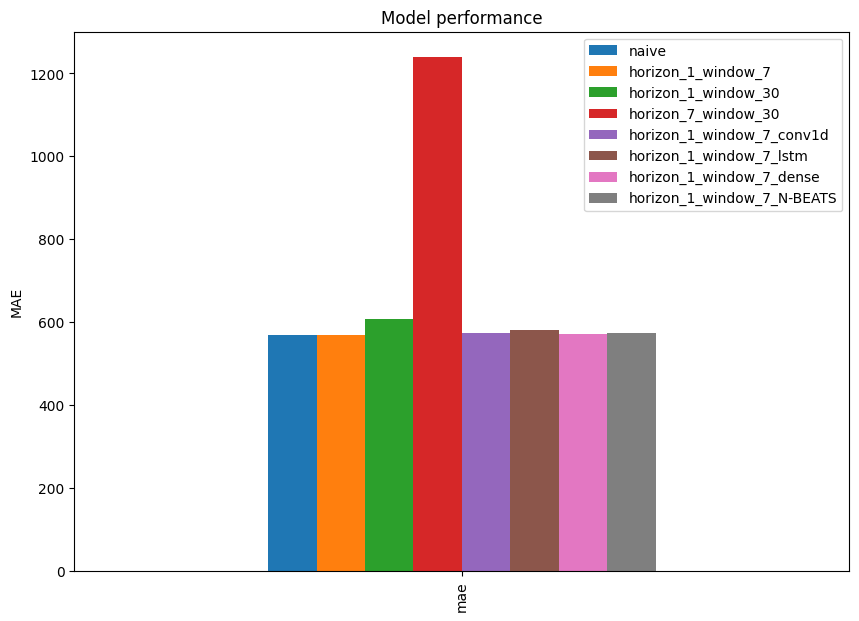

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"],
              "horizon_1_window_7_conv1d": model_4_results["mae"],
              "horizon_1_window_7_lstm": model_5_results["mae"],
              "horizon_1_window_7_dense": model_6_results["mae"],
              "horizon_1_window_7_N-BEATS": model_7_results["mae"]
              }, index=["mae"]).plot(kind="bar", figsize=(10, 7))
plt.title("Model performance")
plt.ylabel("MAE")
plt.legend(bbox_to_anchor=(1.0, 1.0));

## Model 8: Creating an ensemble (stacking different models together)

An ensamble leverage the wisdom of crowd effect

It combine many *different* model to predict common goal.

In [ ]:
HORIZON, WINDOW_SIZE

(1, 7)

### Constructing and fitting and ensemble of models (using diffrnte loss functions)



In [ ]:
def get_ensemble_model(horizon=HORIZON,
                       train_data=train_dataset,
                       test_data=test_dataset,
                       num_iter=10,
                       num_epochs=1000,
                       loss_fn=["mae", "mse", "mape"]
                       ):

  """
  Returns a list of num_iter models each trained on MAE, MSE, and MAPE loss.

  For example, if num_iter= 10, a lis of 30 trained models will be returned:

  10 * len(["mae", "mse"], "mape").
  """

  # Make empty list for trained ensemble models

  ensembled_models = []

  # Create num_iter number of model per loss function
  for i in range(num_iter):

    # Builf and fit a new model with a different los function
    for loss_function in loss_fn:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)

      model = tf.keras.Sequential([
        # Initialize dense layer with normal distribution for estimation prediction intervals later on
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ], name=f"model_{i}")

      # Compile model
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(
                      monitor="val_loss",
                      patience=200,
                      restore_best_weights=True
                          ),
                          tf.keras.callbacks.ReduceLROnPlateau(
                      monitor="val_loss",
                      patience=100,
                      verbose=1
                          )
                ])

      # Append fitted model to list of ensembled models

      ensembled_models.append(model)

  return ensembled_models

In [172]:
%%time
# Get list of trained ensembled
ensembled_models = get_ensemble_model(
    num_iter=5,
    num_epochs=1000
)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 657: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 376: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 476: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 231: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 426: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 548: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 648: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 924: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 193: ReduceLROnPl

In [173]:
len(ensembled_models)

15

In [174]:
# Create a functin which uses a list aof trained model to make and return a list of prediciton
def make_ensembled_preds(ensembled_models, data):
  ensembled_preds = []

  for model in ensembled_models:
    preds = model.predict(data)
    ensembled_preds.append(preds)

  return tf.constant(tf.squeeze(ensembled_preds))

In [175]:
# create a list of ensemble predictions
%%time
ensembled_preds = make_ensembled_preds(ensembled_models, test_dataset)

ensembled_preds

1/1 [==============================] - 0s 56ms/step
CPU times: user 1.12 s, sys: 621 ms, total: 1.74 s
Wall time: 1.02 s


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8788.154,  8769.132,  9065.549, ..., 49652.78 , 48743.25 ,
        46278.438],
       [ 8766.782,  8780.288,  9061.708, ..., 50084.637, 48300.69 ,
        46086.707],
       [ 8796.796,  8825.056,  9092.552, ..., 49734.19 , 48098.062,
        45844.44 ],
       ...,
       [ 8754.34 ,  8710.408,  9086.494, ..., 50219.965, 48733.62 ,
        45948.24 ],
       [ 8829.858,  8782.2  ,  9009.571, ..., 49472.19 , 47950.12 ,
        45712.543],
       [ 8780.138,  8781.464,  9095.825, ..., 49972.62 , 48276.258,
        46114.305]], dtype=float32)>

In [ ]:
model_1_results

{'mae': 568.5037,
 'mse': 1167107.9,
 'rmse': 1080.3276,
 'mape': 2.5398915,
 'mase': 0.9987036}

In [176]:
ensembled_results = evaluate_preds(y_true=y_test,
                                    y_pred=ensembled_preds)
ensembled_results

{'mae': 576.9679,
 'mse': 1162765.9,
 'rmse': 1078.3008,
 'mape': 2.6159816,
 'mase': 1.0135728}

In [ ]:
ensembled_median = np.median(ensembled_preds, axis=0)

ensembled_median[:10]

array([8787.233, 8774.856, 9054.312, 8720.875, 8742.193, 8705.962,
       8648.99 , 8498.231, 8444.48 , 8517.383], dtype=float32)

In [177]:
ensembled_results = evaluate_preds(y_true=y_test,
                                    y_pred=ensembled_median)
ensembled_results

{'mae': 566.56696,
 'mse': 1137422.8,
 'rmse': 1066.5002,
 'mape': 2.5621402,
 'mase': 0.9953012}

Our ensembled preds come out in multiple dimensions but to combine into **point predicitons** we  can leverage the mean of all predictions or the median.

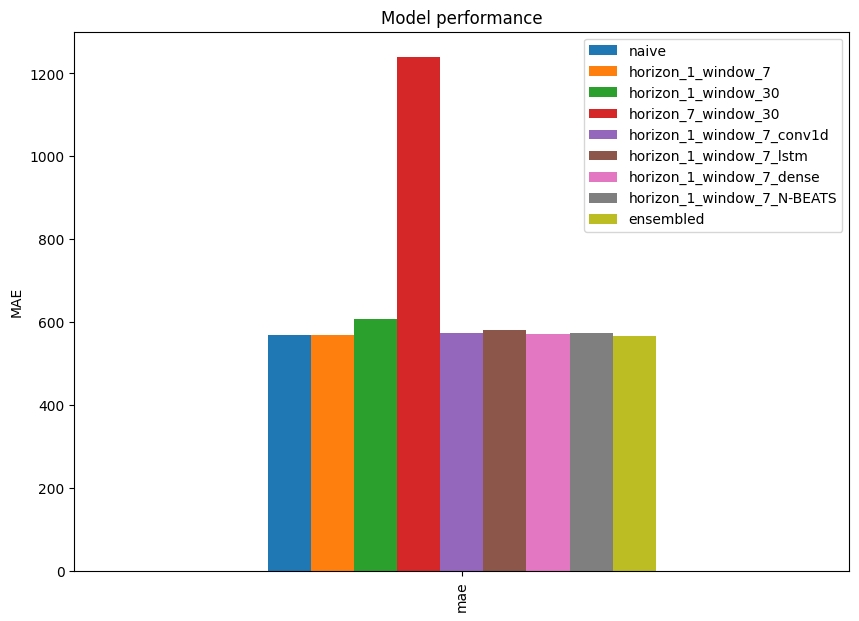

In [178]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"],
              "horizon_1_window_7_conv1d": model_4_results["mae"],
              "horizon_1_window_7_lstm": model_5_results["mae"],
              "horizon_1_window_7_dense": model_6_results["mae"],
              "horizon_1_window_7_N-BEATS": model_7_results["mae"],
              "ensembled": ensembled_results["mae"]
              }, index=["mae"]).plot(kind="bar", figsize=(10, 7))
plt.title("Model performance")
plt.ylabel("MAE")
plt.legend(bbox_to_anchor=(1.0, 1.0));

In [167]:
print('')

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

So far we've bemm making point predicitons with our models.

E.g. horizon = 1, our model predicts tomorrow's price of Bitcoin be $50,000USD

Wouldn't it be helpful if we knew a range of where taht prediction came from?

Instead of 50,000 USD on the dot, how about 48,000 to 52,000 USD?

One way to get the 95% confidence prediction intervals for a deep learning model is the bootsrap method:

1. Take the predicitons from a number o randomly initialized models (we1ve got this thanks to our ensemble models)
2. Measure the standard deviation of the predictions
3. Mulitply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal, 95% of obsertion fall within 1.96 standar deviation of the mean)
4. To the get the prediciton interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the prediction made in (1)

* https://eng.uber.com/neural-networks-uncertainty-estimantion/

In [191]:

# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95%
lower, upper = get_upper_lower(preds=ensembled_preds)

In [192]:
lower, upper

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8724.295 ,  8724.609 ,  9004.776 ,  8640.18  ,  8694.791 ,
         8687.6045,  8589.663 ,  8436.044 ,  8398.38  ,  8493.331 ,
         8138.936 ,  8068.335 ,  8014.568 ,  7574.2246,  7234.593 ,
         7247.7124,  7005.1606,  7142.674 ,  7059.5835,  7449.7334,
         7347.311 ,  7685.703 ,  7528.9224,  7326.716 ,  7261.701 ,
         7253.42  ,  7157.3237,  7346.259 ,  7478.032 ,  7503.7207,
         7520.257 ,  7293.1543,  7177.1973,  7148.5317,  7139.997 ,
         7203.519 ,  7046.808 ,  7069.9795,  6834.914 ,  6556.7925,
         7295.978 ,  7053.141 ,  7041.4272,  7195.52  ,  7182.2295,
         7100.0293,  7198.204 ,  7180.2666,  7139.5312,  7198.886 ,
         7294.5166,  7369.536 ,  7211.387 ,  7127.4097,  7132.474 ,
         6892.896 ,  7234.534 ,  7295.881 ,  7303.602 ,  7669.257 ,
         8021.38  ,  8071.3657,  7797.7437,  8035.468 ,  8048.8657,
         8113.2837,  8074.754 ,  8680.61  ,  8845.413 ,  8684.673 ,

In [194]:
# Get the median/mean values of our ensemble preds

ensembled_median = np.median(ensembled_preds, axis=0)

ensembled_median[:10]

array([8788.154, 8781.464, 9064.764, 8705.943, 8754.967, 8734.704,
       8641.096, 8484.257, 8457.626, 8518.434], dtype=float32)

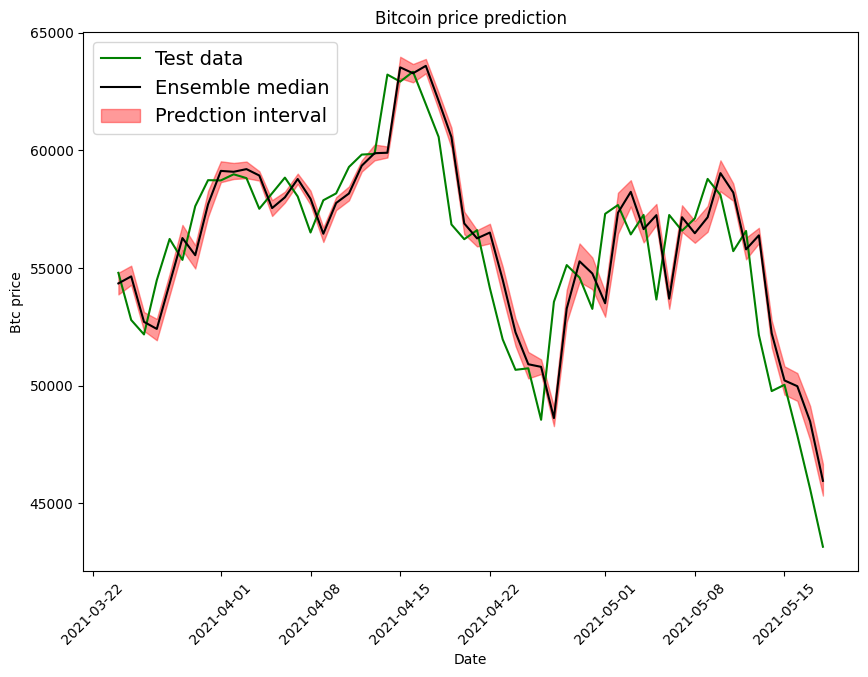

In [202]:
# Plot the median of our ensembled preds along with teh predictions intervals

offset = 500

plt.figure(figsize=(10, 7))

plt.plot(X_test.index[offset:], y_test[offset:], 'g',  label="Test data")
plt.plot(X_test.index[offset:], ensembled_median[offset:], 'k-', label="Ensemble median")
plt.xlabel("Date")
plt.ylabel("Btc price")
plt.title("Bitcoin price prediction")

# To plot the upper and lower bounds, let's use fill_between

plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:],
                 label="Predction interval",
                 color='r',
                 alpha=0.4)

plt.legend(loc="upper left", fontsize=14)
plt.xticks(rotation=45)
plt.show()

So far all of our model predictions have been laggging behind the test data..

As is they replicaitng what the naive model does and just predict the previous timestep as the next step.

# Model 9: Train a model on the full historical data to make predictions into the future

So far all of our models have predicted on the best dataset, however, this is only a pseudofuture.

Let's build amodel which is capable of predicting into the future!

In [203]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [204]:
HORIZON = 1
WINDOW_SIZE = 7

In [205]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [206]:
# Tarin model on entire data to make predicitons for the next day

X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()

# get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [207]:
# Turn data into efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch fro optimal performance
BATCH_SIZE = 1024

dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [216]:


tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all before


#### Make prediciton into future

In [212]:
# How many timestep to predict into the future?

INTO_FUTURE = 14

To make predicitons into the future we want a function which:

1. Takes as input:
  * a list of values (Bitcoin historical data)
  * a trained model (such as ``model_9)
  * a window into the future to predict (our `INTO_FUTURE` variable)
  * the window size a model was trained (`WINDOW_SIZE`) - the model can only predict on the same kind of dta it was trained on

2. Creates an empty list for future forecasts this will be returned at the end of the end, when it's  full of predictions) and extracts the last `window size` from the input values
3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction.

In [214]:

# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [217]:
# Make forecasts into the future
future_forecast = make_future_forecast(values=y_all,
                                     model=model_9,
                                     into_future=INTO_FUTURE,
                                    window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 61ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55246.82421875

1/1 [==============================] - 0s 24ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55246.82421875] -> Prediction: 50456.96484375

1/1 [==============================] - 0s 25ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55246.82421875 50456.96484375] -> Prediction: 49290.23046875

1/1 [==============================] - 0s 24ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55246.82421875 50456.96484375 49290.23046875] -> Prediction: 48196.37890625

1/1 [==============================] - 0s 25ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55246.82421875
 50456.96484375 49290.23046875 48196.3

In [218]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [225]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end

In [226]:

# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep


Timestamp('2021-05-18 00:00:00')

In [227]:

# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [229]:
# Insert last timestep/final price into next times step
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])

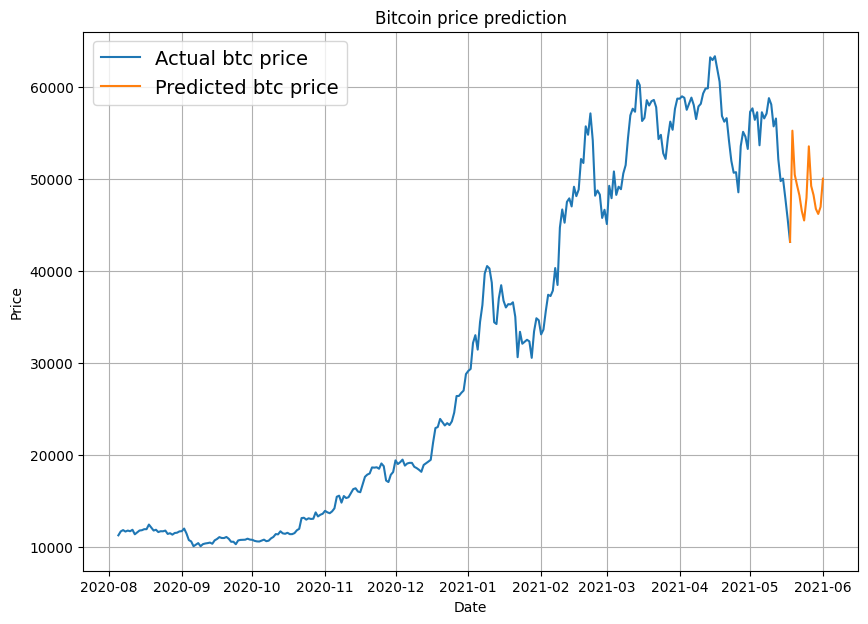

In [230]:
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual btc price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted btc price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(fontsize=14)
plt.title("Bitcoin price prediction")
plt.show()

## Model 10: Why forecasting is BS (the Turkey problem)

In [231]:
 # Let's introduce a turkey problem to our BTC data
 btc_price_turkey = btc_price.copy()

In [232]:
len(btc_price_turkey)

2787

In [233]:
 btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [235]:
# Manufacture a extra price on the end (to showcase our Turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [236]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)

btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

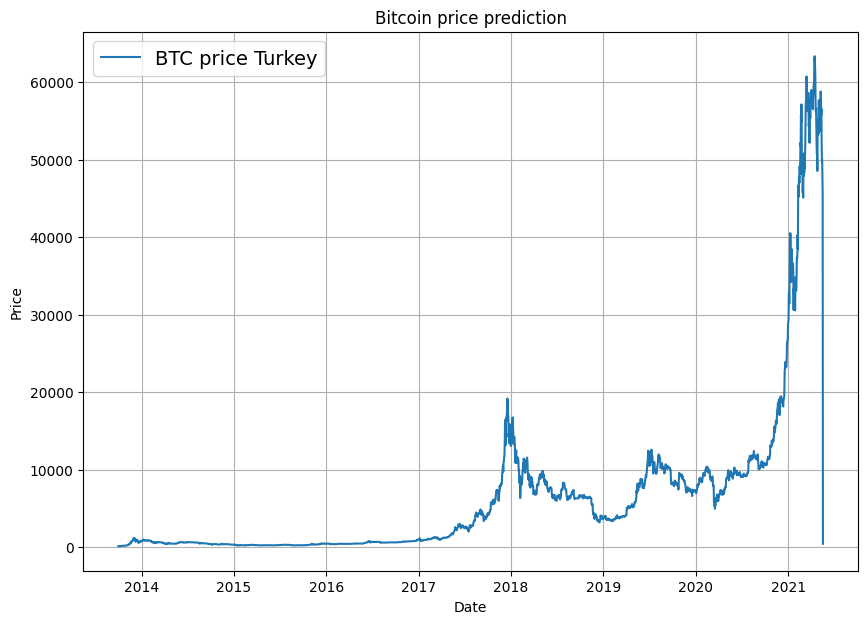

In [238]:
plt.figure(figsize=(10, 7))
plot_time_series(btc_timesteps_turkey, btc_price_turkey, format="-", label="BTC price Turkey")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(fontsize=14)
plt.title("Bitcoin price prediction")
plt.show()

In [239]:
HORIZON = 1
WINDOW_SIZE = 7

In [241]:
full_windows, full_labels = make_windows(np.array(btc_price_turkey),
                                          window_size=WINDOW_SIZE,
                                          horizon=HORIZON)

X_train, X_test, y_train, y_test = train_test_split(full_windows,
                                                    full_labels,
                                                    test_size=0.2,
                                                    shuffle=False)

### Build a turkey model

In [246]:
turkey_model = tf.keras.models.clone_model(model_1)

turkey_model._name = "model_10_turkey_model"

turkey_model.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam())

turkey_model.fit(X_train,
                 y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(model_name=turkey_model.name)]
                 )

In [247]:
# Evaluate the model
turkey_model_results = evaluate_preds(y_true=y_test,
                                       y_pred=turkey_model.predict(X_test))
turkey_model_results

18/18 [==============================] - 0s 1ms/step


{'mae': 647.6557,
 'mse': 4862633.0,
 'rmse': 647.6557,
 'mape': 21.455229,
 'mase': 1.0022494}

In [250]:
# Load best perming turkey model
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 647.6556


647.6556396484375

In [251]:
turkey_preds = make_preds(turkey_model, X_test)

turkey_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8818.979, 8754.77 , 9037.491, 8749.109, 8698.662, 8723.261,
       8660.041, 8477.965, 8443.846, 8510.105], dtype=float32)>

In [252]:
turkey_results = evaluate_preds(y_true=y_test,
                                 y_pred=turkey_preds)
turkey_results

{'mae': 17122.83,
 'mse': 613924350.0,
 'rmse': 23699.732,
 'mape': 121.24873,
 'mase': 26.497637}

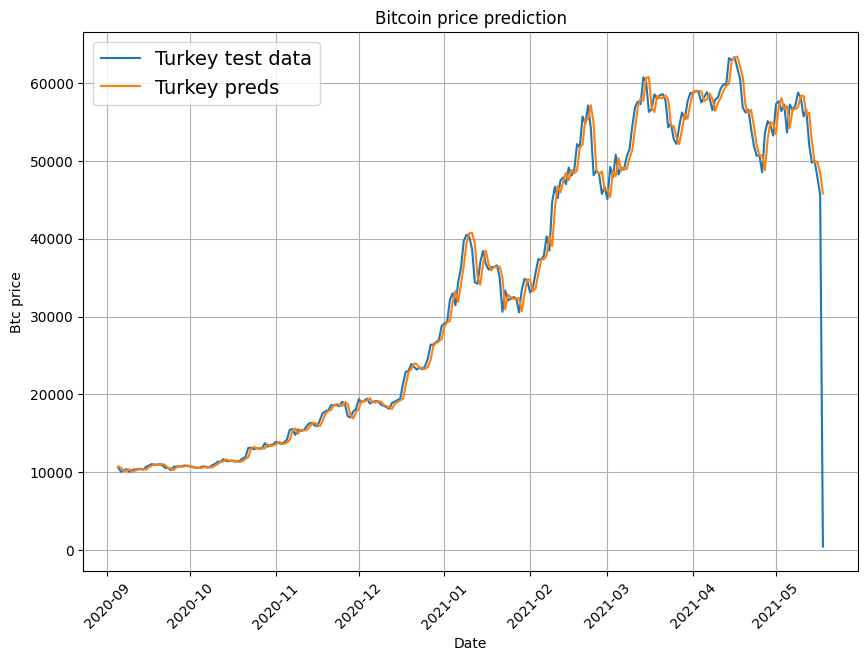

In [257]:
plt.figure(figsize=(10, 7))

offset = 300

plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 start=offset,
                 format="-",
                 label="Turkey test data")

plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 start=offset,
                 format="-",
                 label="Turkey preds")

plt.xlabel("Date")
plt.ylabel("Btc price")
plt.title("Bitcoin price prediction")

plt.legend(loc="upper left", fontsize=14)
plt.xticks(rotation=45)
plt.show()

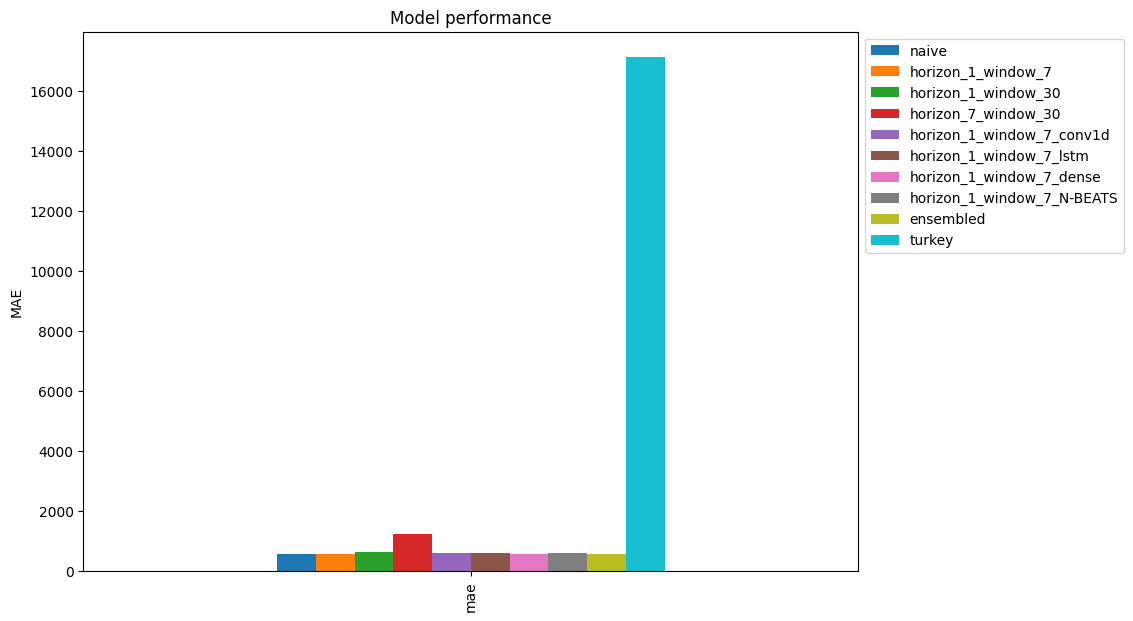

In [258]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"],
              "horizon_1_window_7_conv1d": model_4_results["mae"],
              "horizon_1_window_7_lstm": model_5_results["mae"],
              "horizon_1_window_7_dense": model_6_results["mae"],
              "horizon_1_window_7_N-BEATS": model_7_results["mae"],
              "ensembled": ensembled_results["mae"],
              "turkey": turkey_results["mae"]
              }, index=["mae"]).plot(kind="bar", figsize=(10, 7))
plt.title("Model performance")
plt.ylabel("MAE")
plt.legend(bbox_to_anchor=(1.0, 1.0));